

Materialet och exempel från Mathematical Models in Biology : An Introduction

    Författare: Allman, Elizabeth Spencer, Rhodes, John A.
    Datum: 2004
    
    


Vi föreställer oss en skog med två sorters träd. Antalet träd av de olika sorterna vid en given tidpunkt $t$ beteckans med $A_t$ respektive $B_t$. När ett träd dör blir en plats ledig och den nya platsen kan tas upp av ett $A$ eller $B$ träd.


Antag att träd $A$ är långlivad och att endast 1% av dem dör varje år. Av typ $B$ dör 5% varje år. Av olika anledningar har B större chans att kunna ta över en ledig plats, säg 75%. Sannolikheten för att träd av typ A ska ta platsen är då resten, 25%. Vi kan sammanfatta detta matematiskt. $A_{t+1}$ betecknar antalet träd av typ $A$ nästa år.


$A_{t+1}=0,99A_t + 0,25 \cdot 0,01A_t+0,25\cdot 0,05B_t$

$B_{t+1}=0,75 \cdot 0,01A_t +0,95B_t+0,75 \cdot0,05B_t$

Uppgift 1. Förklara de olika termernas innebörd.


Vi förenklar uttrycken:

$A_{t+1}=0,9925A_t+0,0125B_t$

$B_{t+1}=0,0075A_t+0,9875B_t$


Relationerna kan skrivas med hjälp av matris: $X_{t+1}=TX_{t}$ med 

$$X_{t}=\left(\begin{array}{c}
A_{t}\\
B_{t}
\end{array}\right)
,$$
$$X_{t+1}=\left(\begin{array}{c}
A_{t+1}\\
B_{t+1}
\end{array}\right)
$$
och 

$$
T=\left(\begin{array}{cc}
0,9925 & 0,0125\\
0,0075 & 0,9875
\end{array}\right)
.$$


Genom att välja olika utgångslägen $A_0=10$ och $B_0=990$ kan vi studera tidsutvecklingen steg för steg och plotta värdena i en graf. Vi skriver ett litet program i python.

x 625.0000000000482  y 375.00000000003087


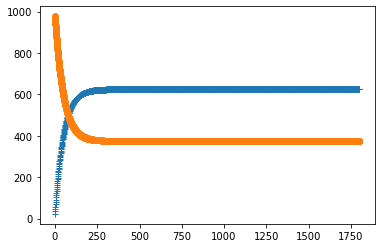

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#Startvärdena för träden
X=np.array([10,990]).reshape(2,1)

#Matrisen
T=np.array([[0.9925, 0.0125],[0.0075, 0.9875]])
nr=np.arange(0,1800,1)
Xserie=X

#Vi lagrar alla resultat i Xserie
for i in nr:
    X=T@X
    Xserie=np.hstack((Xserie,X))


#Alla x-värden i en vektor, y i en annan
x=[];y=[]
for i in nr+1:
    x.append(Xserie[0][i])
    y.append(Xserie[1][i])

#Vill se sista värdet i tabellen
print("x", x[-1], " y", y[-1])

plt.plot(x, "+")
plt.plot(y, "o")
plt.show()


Verkar som om det finns någon form av jämviktsläge vid $A=625$ respektive $B=375$. Vi startade med $A_0=10, B_0=990$.
Prova olika startvärden för att se om det verkar hålla. En djupare fråga är var värdena 625 och 375 kommer ifrån.

För att föstå systemets beteende beräknar vi egenvärdena för matrisen. Vi kan beräkna dem för hand eftersom matrisen bara är 2 gånger 2. Python kan också göra det, se kodblocket nedan, och vi erhåller att egenvärdena är 1 och 0,98.

Egenvektorerna är (0.85749293,0.51449576) och (-0.70710678, 0.70710678). Viket, om vi studerar kvoterna mellan elementen får oss att tro att den andra vektorn lika gärna kan skrivas (-1,1). Och 0.85749293/0.51449576=1,66666666 dvs 5/3 så första egenvektorn kan skriva (5, 3).

In [53]:
import numpy as np

T=np.array([[0.9925, 0.0125],[0.0075, 0.9875]])


EV=np.linalg.eig(T)
print(EV)

(array([1.  , 0.98]), array([[ 0.85749293, -0.70710678],
       [ 0.51449576,  0.70710678]]))


Det gäller således för vår matris T att 

$$ 
T\left(\begin{array}{c}
5\\
3
\end{array}\right)=1\left(\begin{array}{c}
5\\
3
\end{array}\right)
$$

och

$$
T\left(\begin{array}{c}
-1\\
1
\end{array}\right)=0,98\left(\begin{array}{c}
-1\\
1
\end{array}\right)
$$


Vi kan nu använda egenvektorerna som en bas. Vi skriver $X_0$ med hjälp av egenvektorerna $V_1$ och $V_2$:
$$
X_{0}=c_{1}V_{1}+c_{2}V_{2}.
$$


i vårt specifika fall

$$
\left(\begin{array}{c}
10\\
990
\end{array}\right)=c_{1}\left(\begin{array}{c}
5\\
3
\end{array}\right)+c_{2}\left(\begin{array}{c}
-1\\
1
\end{array}\right).
$$


Om vi vill beräkna $X_1$, nästa tidssteg, så multiplicerar vi med $T$:

$$TX_{0}=c_{1}TV_{1}+c_{2}TV_{2}.$$

Och $TX_{0}=X_1$, och för egenvektorna med egenvärden gäller att $TV_1=\lambda_1V_1$, $TV_2=\lambda_2V_2$. Detta upprepar sig $TX_1=X_2$ osv. $T(\lambda_1V_1)={\lambda_1}^2V_1$. Efter $n$ tidssteg:


$$X_{n}=c_{1}\lambda^{n}V_{1}+c_{2}\lambda^{n}V_{2}.$$






Vi tillämpar uppdelningen i egenvektorer på vårt ursprungliga problem. Vi bestämmer $c_1$ och $c_2$.
Vi hade

$$
\left(\begin{array}{c}
10\\
990
\end{array}\right)=c_{1}\left(\begin{array}{c}
5\\
3
\end{array}\right)+c_{2}\left(\begin{array}{c}
-1\\
1
\end{array}\right)
.$$


Som kan skrivas

$$
\left(\begin{array}{c}
10\\
990
\end{array}\right)=\left(\begin{array}{cc}
5 & -1\\
3 & 1
\end{array}\right)\left(\begin{array}{c}
c_{1}\\
c_{2}
\end{array}\right)
.$$


Genom att bestämma inversen kan vi bestämma koefficienterna. Vi ber python bestämma inversen till
$$ \left(\begin{array}{cc}
5 & -1\\
3 & 1
\end{array}\right)$$

In [54]:
#Koefficientmatrisen för ekvationssystemet
A=np.array([[5,-1],[3,1]])

b=np.array([10,990]).reshape(2,1)

#Inversen
Ainv=np.linalg.inv(A)

#De obekanta koefficienterna
X=Ainv@b


print("Koefficienterna är \n", X)
print("Inversen är ", Ainv)

Koefficienterna är 
 [[125.]
 [615.]]
Inversen är  [[ 0.125  0.125]
 [-0.375  0.625]]


Vilet innebär att $c_1=125$ och $c_2=615$. Vi kan nu skriva


$$
\left(\begin{array}{c}
10\\
990
\end{array}\right)=125\cdot \left(\begin{array}{c}
5\\
3
\end{array}\right)+615\cdot \left(\begin{array}{c}
-1\\
1
\end{array}\right)
.$$


Med denna kan vi se hur $X_n$ beräknas och faktiskt ta fram en formel för alla värdena, tack vare egenvektorerna.

$$
X_{n}	=125\cdot1^{n}\left(\begin{array}{c}
5\\
3
\end{array}\right)+615\cdot0,98^{n}\left(\begin{array}{c}
-1\\
1
\end{array}\right)
	=\left(\begin{array}{c}
125\cdot1^{n}\cdot5+615\cdot0,98^{n}\cdot(-1)\\
125\cdot1^{n}\cdot3+615\cdot0,98^{n}\cdot1
\end{array}\right)
	=\left(\begin{array}{c}
625-615\cdot0,98^{n}\\
375+615\cdot0,98^{n}
\end{array}\right)
$$


Om vi låter $n$ gå mot oändligheten ser vi algebraiskt att $X_n$ går mot (625, 375) vilket är de gränser vi fann grafiskt med hjälp av python. Proportionen mellan elementen i egenvektorn är också proportionen mellan gränsvärdena.

Uppgift 2 Leslie modellen

Leslie modellen används ofta för att dela in populationer i åldersklasser.
Vi använder bara 2 åldersklasser. Kalla åldersklasserna för u för unga och v för vuxna. En vektor är då 

$$
P=\left(\begin{array}{c}
u\\
v
\end{array}\right)
.$$

Utvecklingen 1 år senare ges av matrisen

$$T=\left(\begin{array}{cc}
0,125 & 6\\
0,2 & 0
\end{array}\right).
$$

Vi analyserar den: $u_{t+1}=0,125u_t+6v_t$. Nästa generation unga(ej könsmogna) består av 12,5% av de unga som fanns förra säsongen plus att de vuxna fått 6 nya barn. Den andra ekvationen är: $v_{t+1}=0,2u_t+0v_t$. Nästa generation av vuxna består av att 20% av de unga nu blivit vuxna och inga av de vuxna förra säsongen är kvar som vuxna den andra säsongen.

1. Skriv ett pythonprogram som visar utvecklingen år för år för olika startvärden på populationen. Experimentera med olika startvärden.
2. Beräkna egenvärdena och använd dem för analys.
3. Ett egenvärde kommer att vara negativt, vad innebär det i grafen?
4. Vad händer om du väljer en av egenvektorerna som startvärde?
5. Prova med andra matriser.

$$T=\left(\begin{array}{cc}
0 & 6\\
0,2 & 0,25
\end{array}\right).
$$

$$T=\left(\begin{array}{cc}
0 & 6\\
1/6 & 0
\end{array}\right).
$$

$$T=\left(\begin{array}{cc}
0 & 6\\
1/7 & 0
\end{array}\right).
$$

$$T=\left(\begin{array}{cc}
0 & 6\\
1/6 & 0,25
\end{array}\right).
$$
$$T=\left(\begin{array}{cc}
0 & 6\\
1/12 & 0,25
\end{array}\right).
$$

In [55]:
#test
import numpy as np

T=np.array([[0.11, 0.15, 0.15],[0.3, 0, 0],[0,0.6,0.6]])


EV=np.linalg.eig(T)
print(EV)

(array([-3.05311332e-16,  3.09243915e-02,  6.79075608e-01]), array([[ 4.32425908e-16,  7.07587979e-02,  2.83621179e-01],
       [-7.07106781e-01,  6.86436768e-01,  1.25297320e-01],
       [ 7.07106781e-01, -7.23738735e-01,  9.50715314e-01]]))


x 0.035511940614221464  y 0.015688359368989133  z 0.1190381687157018


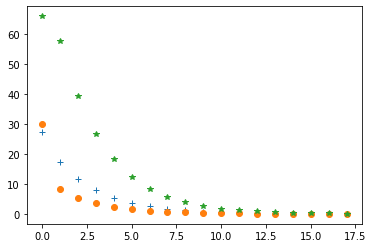

In [56]:
#test
import matplotlib.pyplot as plt
import numpy as np

#Startvärdena för 
X=np.array([100,10,100]).reshape(3,1)

#Matrisen
T=np.array([[0.11, 0.15, 0.15],[0.3, 0, 0],[0,0.6,0.6]])
nr=np.arange(0,18,1)
Xserie=X

#Vi lagrar alla resultat i Xserie
for i in nr:
    X=T@X
    Xserie=np.hstack((Xserie,X))


#Alla x-värden i en vektor, y i en annan
x=[];y=[];z=[]
for i in nr+1:
    x.append(Xserie[0][i])
    y.append(Xserie[1][i])
    z.append(Xserie[2][i])

#Vill se sista värdet i tabellen
print("x", x[-1], " y", y[-1], " z", z[-1])

plt.plot(x, "+")
plt.plot(y, "o")
plt.plot(z, "*")

plt.show()

In [57]:
#test
import numpy as np

T=np.array([[0.125, 6],[0.2, 0]])


EV=np.linalg.eig(T)
print(EV)

(array([ 1.15972662, -1.03472662]), array([[ 0.98545341, -0.98182756],
       [ 0.16994581,  0.18977526]]))


x 3516.9165150437984  y 788.1874885030792


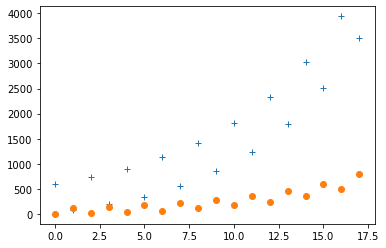

In [58]:
#test
import matplotlib.pyplot as plt
import numpy as np

#Startvärdena för 
X=np.array([10,100]).reshape(2,1)

#Matrisen
T=np.array([[0.125, 6],[0.2, 0]])
nr=np.arange(0,18,1)
Xserie=X

#Vi lagrar alla resultat i Xserie
for i in nr:
    X=T@X
    Xserie=np.hstack((Xserie,X))


#Alla x-värden i en vektor, y i en annan
x=[];y=[]
for i in nr+1:
    x.append(Xserie[0][i])
    y.append(Xserie[1][i])

#Vill se sista värdet i tabellen
print("x", x[-1], " y", y[-1])

plt.plot(x, "+")
plt.plot(y, "o")

plt.show()